# ORDINARY DIFFERENTIAL EQUATIONS

Assignement ODE2 : Octobre 23 2021

# Question 1
Considering differential equations of the general form below
\begin{equation}
\label{eq23}
    \frac{du}{dt}=Au+F(u,t) \;\;on \;\; [a,b]
\end{equation}
The integrating factor is given by $e^{-At}$, multiplying the differential equation by the integrating factor,the expression becomes
\begin{equation}
\label{eq24}
    e^{-At}\frac{du}{dt}=e^{-At}Au+e^{-At}F(u,t)
\end{equation}
We can see that the expression $e^{-At}\frac{du}{dt}-e^{-At}Au$ is the derivative of the product of $u$ and $e^{-At}$ such that the equation above can be written as
\begin{equation}
\label{eq25}
    \frac{d}{dt}(e^{-At}u)=e^{-At}F(u,t)
\end{equation}
We can integrate both sides of the expression to obtain
\begin{equation}
\label{eq26}
    e^{-At}u=u_0+\int_0^{t} e^{-A\tau}F(u,\tau)d\tau
\end{equation}
and now dividing the whole equation by $e^{-At}$, it becomes
\begin{equation}
\label{eq27}
    u=e^{At}u_0+e^{At}\int_0^{t} e^{-A\tau}F(u,\tau)d\tau
\end{equation}
considering only the solution on one step time $h$, this equation can be transformed as shown below
\begin{equation}
\label{eq28}
    u=e^{Ah}u_0+e^{Ah}\int_0^{h} e^{-A\tau}F(u,\tau)d\tau
\end{equation}
And this equation leads to the step integral formula given by
\begin{equation}
\label{eq29}
    u(t_{n+1})=e^{Ah}u(t_n)+\int_0^{h} e^{-(\tau - h)A}F(u(t_n+\tau),t_n+\tau)d\tau
\end{equation}



# Question 2
Consider the integral given in questio 1, for small time step the function $F(u(t_n+\tau),t_n+\tau)$ can be assumed to be constant denoted and by $F_n$, we can also separate the exponential as $e^{-(\tau - h)A} = e^{-\tau A}e^A$, these considerations lead to
\begin{equation}
\label{eq30}
    u_{n+1}=e^{Ah}u_n+\left(e^{Ah}\int_0^{h} e^{-\tau A}d\tau\right)F_n
\end{equation}
This integral gives
\begin{equation}
\label{eq31}
    u_{n+1}=e^{Ah}u_n+e^{Ah}\left(\frac{-1}{A} e^{-\tau A}\Big|_0^h\right)F_n
\end{equation}
Considering the limit of this integral, we obtain
\begin{equation}
\label{eq32}
    u_{n+1}=e^{Ah}u_n+\left(-\frac{1}{A}+\frac{e^{hA}}{A}\right)F_n
\end{equation}
Taking the inverse of $A$ outside of the parenthesis we obtain the final form of the recurrence formula
\begin{equation}
\label{eq33}
    u_{n+1}=e^{Ah}u_n+(e^{hA}-I)A^{-1}F_n
\end{equation}


# Question 3

 Write a python function, $ExpoMethod$ that takes $a, b, A, F, h, u_0$ as input and return
the list of $u_n$

In [1]:
from scipy.linalg import expm,inv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ExpoMethod(a,b,A,F,h,u0):
    if a>b:
        a,b=b,a  
    N=int((b-a)/h)+1    
    t=np.linspace(a,b,N)
    U=np.zeros([len(t),len(u0)])
    U[0]=u0
    T=expm(h*A)
    Ai=inv(A)
    I=np.identity(len(T))
    H=(T-I)@Ai 
    for n in range(len(t)-1):
        U[n+1]=T@U[n]+H@F(U[n],t[n])
    return U,t

# Question 4

Let us consider the system of ODE in Question 1 of Exercise 3 on [0, 1] (Note
that in this case F(u, t) = 0). Plot in different graph

1. The components of the exact and approximate solution obtained with $ExpoMethod$
against the time.

In [3]:
# The function F(u,t) =0

def Fc(u,t):
    F=np.array([0,0,0])
    return F

In [4]:
# The inputs of ExpoMethods

h=0.01
a=0
b=1
A=np.array([[2,2,1],[1,3,1],[1,2,2]])
u0=np.array([1,0,0])
U,t=ExpoMethod(a,b,A,Fc,h,u0)

In [7]:
#Exact solution

def ExactSol(t):
    u1=(1/4)*np.exp(5*t)+(3/4)*np.exp(t)
    u2=(1/4)*np.exp(5*t)-(1/4)*np.exp(t)
    u3=(1/4)*np.exp(5*t)-(1/4)*np.exp(t)
    u=np.array([u1,u2,u3])
    return u

In [8]:
Ue=ExactSol(t)
Ue

array([[1.00000000e+00, 1.02035540e+00, 1.04144373e+00, 1.06329946e+00,
        1.08595877e+00, 1.10945968e+00, 1.13384211e+00, 1.15914802e+00,
        1.18542148e+00, 1.21270876e+00, 1.24105851e+00, 1.27052181e+00,
        1.30115234e+00, 1.33300649e+00, 1.36614353e+00, 1.40062569e+00,
        1.43651839e+00, 1.47389035e+00, 1.51281380e+00, 1.55336461e+00,
        1.59562253e+00, 1.63967132e+00, 1.68559905e+00, 1.73349823e+00,
        1.78346609e+00, 1.83560480e+00, 1.89002173e+00, 1.94682972e+00,
        2.00614735e+00, 2.06809924e+00, 2.13281637e+00, 2.20043638e+00,
        2.27110393e+00, 2.34497105e+00, 2.42219754e+00, 2.50295133e+00,
        2.58740893e+00, 2.67575584e+00, 2.76818705e+00, 2.86490749e+00,
        2.96613255e+00, 3.07208862e+00, 3.18301364e+00, 3.29915774e+00,
        3.42078379e+00, 3.54816810e+00, 3.68160110e+00, 3.82138808e+00,
        3.96784990e+00, 4.12132384e+00, 4.28216444e+00, 4.45074434e+00,
        4.62745525e+00, 4.81270889e+00, 5.00693808e+00, 5.210597

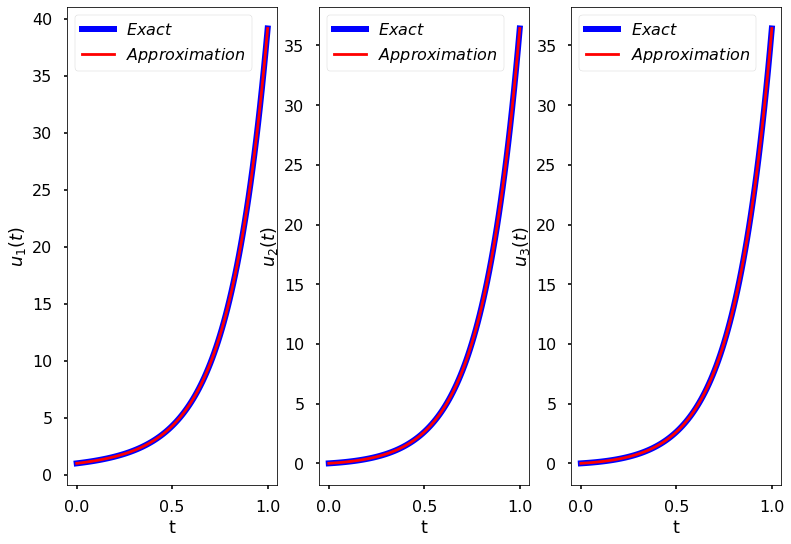

In [9]:
plt.style.use('seaborn-poster')

plt.subplot(1,3,1)
plt.ylabel('$u_1(t)$')
plt.plot(t,Ue[0],'b-',label=r'$Exact$',linewidth=6)
plt.plot(t,U[:,0],'r-',label=r'$Approximation$')
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.ylabel('$u_2(t)$')
plt.plot(t,Ue[1],'b-',label=r'$Exact$',linewidth=6)
plt.plot(t,U[:,1],'r-',label=r'$Approximation$')
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.ylabel('$u_3(t)$')
plt.plot(t,Ue[2],'b-',label=r'$Exact$',linewidth=6)
plt.plot(t,U[:,2],'r-',label=r'$Approximation$')
plt.xlabel('t')
plt.legend(loc='best')


plt.show()

2. Plot the absolute error between the exact and tha approximation

In [10]:
error1=abs(Ue[0]-U[:,0])
error2=abs(Ue[1]-U[:,1])
error3=abs(Ue[2]-U[:,2])

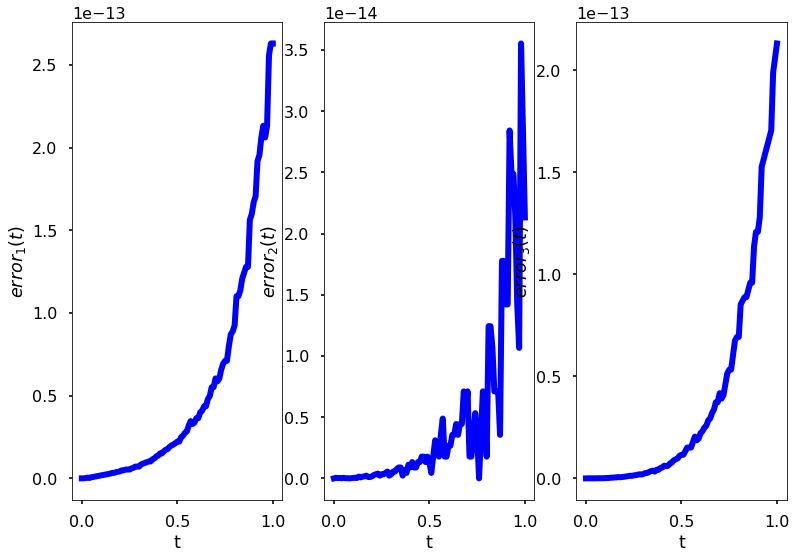

In [11]:
plt.style.use('seaborn-poster')

plt.subplot(1,3,1)
plt.ylabel('$error_1(t)$')
plt.plot(t,error1,'b-',linewidth=6)
plt.xlabel('t')

plt.subplot(1,3,2)
plt.ylabel('$error_2(t)$')
plt.plot(t,error2,'b-',linewidth=6)
plt.xlabel('t')

plt.subplot(1,3,3)
plt.ylabel('$error_3(t)$')
plt.plot(t,error3,'b-',linewidth=6)
plt.xlabel('t')

plt.show()

In [ ]:
# The function F(u,t) =0

def Fc(u,t):
    F=np.array([0,0,0])
    return F

# Question 5

By using $ExpoMethod$, plot the components of the numerical solution of Eq (1) on
[0, 1] when

In [12]:
def F(u,t):
    F=np.array([t**3,0,t**2])
    return F

In [13]:
U1,t=ExpoMethod(a,b,A,F,h,u0)

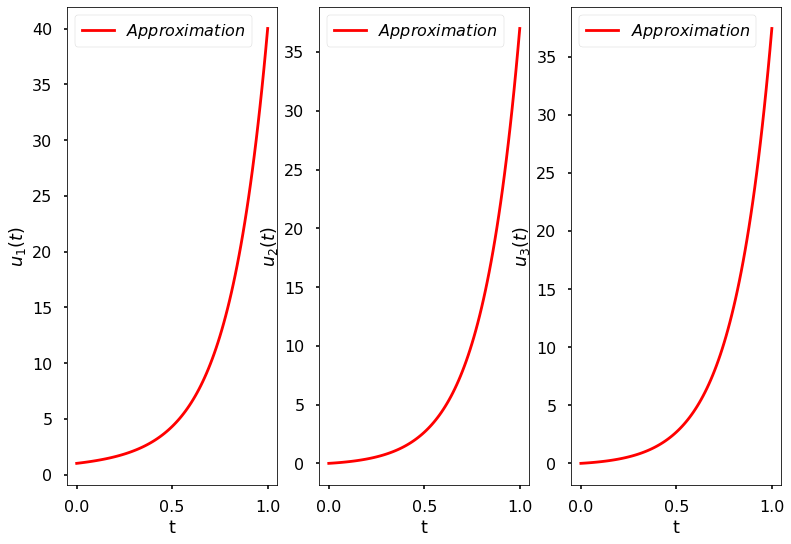

In [14]:
plt.style.use('seaborn-poster')

plt.subplot(1,3,1)
plt.ylabel('$u_1(t)$')
plt.plot(t,U1[:,0],'r-',label=r'$Approximation$')
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.ylabel('$u_2(t)$')
plt.plot(t,U1[:,1],'r-',label=r'$Approximation$')
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.ylabel('$u_3(t)$')
plt.plot(t,U1[:,2],'r-',label=r'$Approximation$')
plt.xlabel('t')
plt.legend(loc='best')


plt.show()